<a href="https://colab.research.google.com/github/Armos05/Medical-Image-Filters/blob/main/MRI_denoising_NLM_and_BM3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Image

In [1]:
from google.colab import files
t_image = files.upload()

Saving MRI_Head_Brain_Normal.jpg to MRI_Head_Brain_Normal.jpg


In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('MRI_Head_Brain_Normal.jpg')

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

## Adding Salt and Pepper Noise

In [3]:
import random

def sp_noise(image,prob):

    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

9.392972649216077

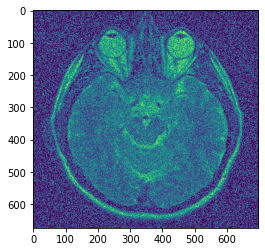

In [13]:
sp_2 = sp_noise(image, 0.15)
plt.imshow(rgb2gray(sp_2))
cv2.PSNR(rgb2gray(image),rgb2gray(sp_2))


## Non Local Means Filter

11.856029214506629

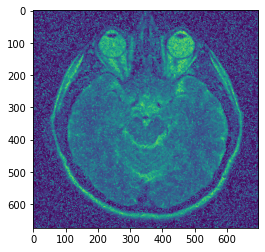

In [17]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma

img = rgb2gray(sp_2)

sigma_est = np.mean(estimate_sigma(img, multichannel=True))
#sigma_est = 0.1

denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True,
                               patch_size=5, patch_distance=3, multichannel=False)

#denoise_img_as_8byte = img_as_ubyte(denoise_img)


plt.imshow(denoise_img)
cv2.PSNR(rgb2gray(image),denoise_img)

9.551368517290076

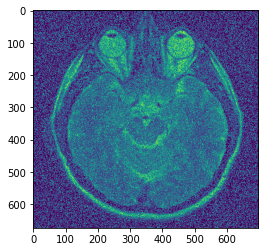

In [18]:
denoise_img2 = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=False,
                               patch_size=5, patch_distance=3, multichannel=False)

#denoise_img_as_8byte = img_as_ubyte(denoise_img)


plt.imshow(denoise_img2)
cv2.PSNR(rgb2gray(image),denoise_img2)

## Block Matching and 3D filtering

In [20]:
pip install bm3d

     |████████████████████████████████| 8.4MB 5.0MB/s 


9.392991621544837

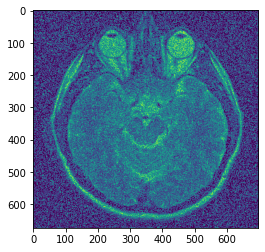

In [24]:
import bm3d

BM3D_denoised_image = bm3d.bm3d(rgb2gray(sp_2), sigma_psd=0.2, stage_arg= bm3d.BM3DStages.ALL_STAGES)

plt.imshow(BM3D_denoised_image)
cv2.PSNR(rgb2gray(image),BM3D_denoised_image)